# Automatic Contour Example

- **By:** [Michael T. Kuczynski](https://www.linkedin.com/in/mkuczyns/), 2024  
- **License:** CC-BY 
- **How to cite:** Cite the ORMIR_XCT publication: *Kuczynski, M.T., et al. "ORMIR_XCT: A Python package for high resolution peripheral quantitative computed tomography image processing." arXiv preprint arXiv:2309.04602 (2023).*

---
# Aims

- This Jupyter Notebook provides an example of running the automatic periosteal contouring script from the ORMIR_XCT package. 
- An example periosteal contour generated using the standard IPL workflow is used as comparison. 
- The DICE coefficient, Jaccard index, and Hausdorff distance are used to compare between the two contour methods.
- The ORMIR_XCT automatic contouring script performs image segmentation on HR-pQCT images of joints to separate bone from other tissues. The script outputs the proximal, distal, and full joint mask for each image.

  **Table of contents**  
  [Step 1: Imports](#imports)   
  [Step 2: Automatic Contour](#contour)  
  [Step 3: Display Results](#results)  
  [Step 4: Compare IPL to ORMIR_XCT](#compare)


---

<a name="imports"></a>
## *Step 1: Imports:*

Import modules/packages and set the input image path. 

In [82]:
import os
import numpy as np
import SimpleITK as sitk

from matplotlib import pyplot as plt

from ormir_xct.autocontour.autocontour import autocontour
from ormir_xct.util.segmentation_evaluation import (
    calculate_dice_and_jaccard,
    hausdorff_sitk,
)

In [83]:
joint_seg_path = os.path.join("images", "GRAY_JOINT.nii")
joint_seg_ipl_path = os.path.join("images", "AUTOCONTOUR_IPL.nii")
output_path = "images"

gray_img = sitk.ReadImage(joint_seg_path, sitk.sitkFloat32)
ipl_mask = sitk.ReadImage(joint_seg_ipl_path, sitk.sitkUInt8)

---

<a name="contour"></a>
## *Step 2: Run the ORMIR_XCT Automatic Contour:*

Run the ORMIR_XCT automatic periosteal contour script on the input grayscale joint image. This script will return the distal, proximal, and full joint mask. The full joint mask will be used for comparison with the IPL periosteal contour workflow results.

When running the ORMIR_XCT automatic contour script, we need to provide the image units and parameters for unit conversion to get an accurate segmentation. Since we are using an AIM/ISQ image that has been converted to another file type using the ITKIOScanco module from ITK, the image units are Hounsfield Units (HU). For the sample image provided, the follow parameters taken from the AIM header are used:

- mu_water = 0.24090
- resale_slope = 1603.51904 
- rescale_intercept = -391.209015

These values may vary depending on your scanner.

In [84]:
mu_water = 0.24090
rescale_slope = 1603.51904
rescale_intercept = -391.209015

dst_mask, prx_mask, ormir_mask = autocontour(
    gray_img, mu_water, rescale_slope, rescale_intercept
)

---

<a name="results"></a>
## *Step 3: Display Results:*

Now display the ORMIR_XCT and IPL segmentations together.

In [85]:
# Convert the images to numpy arrays for plotting with Matplotlib
gray_np = sitk.GetArrayFromImage(gray_img)
ormir_np = sitk.GetArrayFromImage(ormir_mask)
ipl_np = sitk.GetArrayFromImage(ipl_mask)

In [86]:
# Get the slices we want to view
view_slice1 = (slice(None), 45 - ormir_np.shape[1] // 2, slice(None))
view_slice2 = (slice(None), ormir_np.shape[1] // 2, slice(None))
view_slice3 = (slice(None), 45 + ormir_np.shape[1] // 2, slice(None))

slice1 = abs(int(45 - ormir_np.shape[1] // 2))
slice2 = int(ormir_np.shape[1] // 2)
slice3 = int(45 + ormir_np.shape[1] // 2)

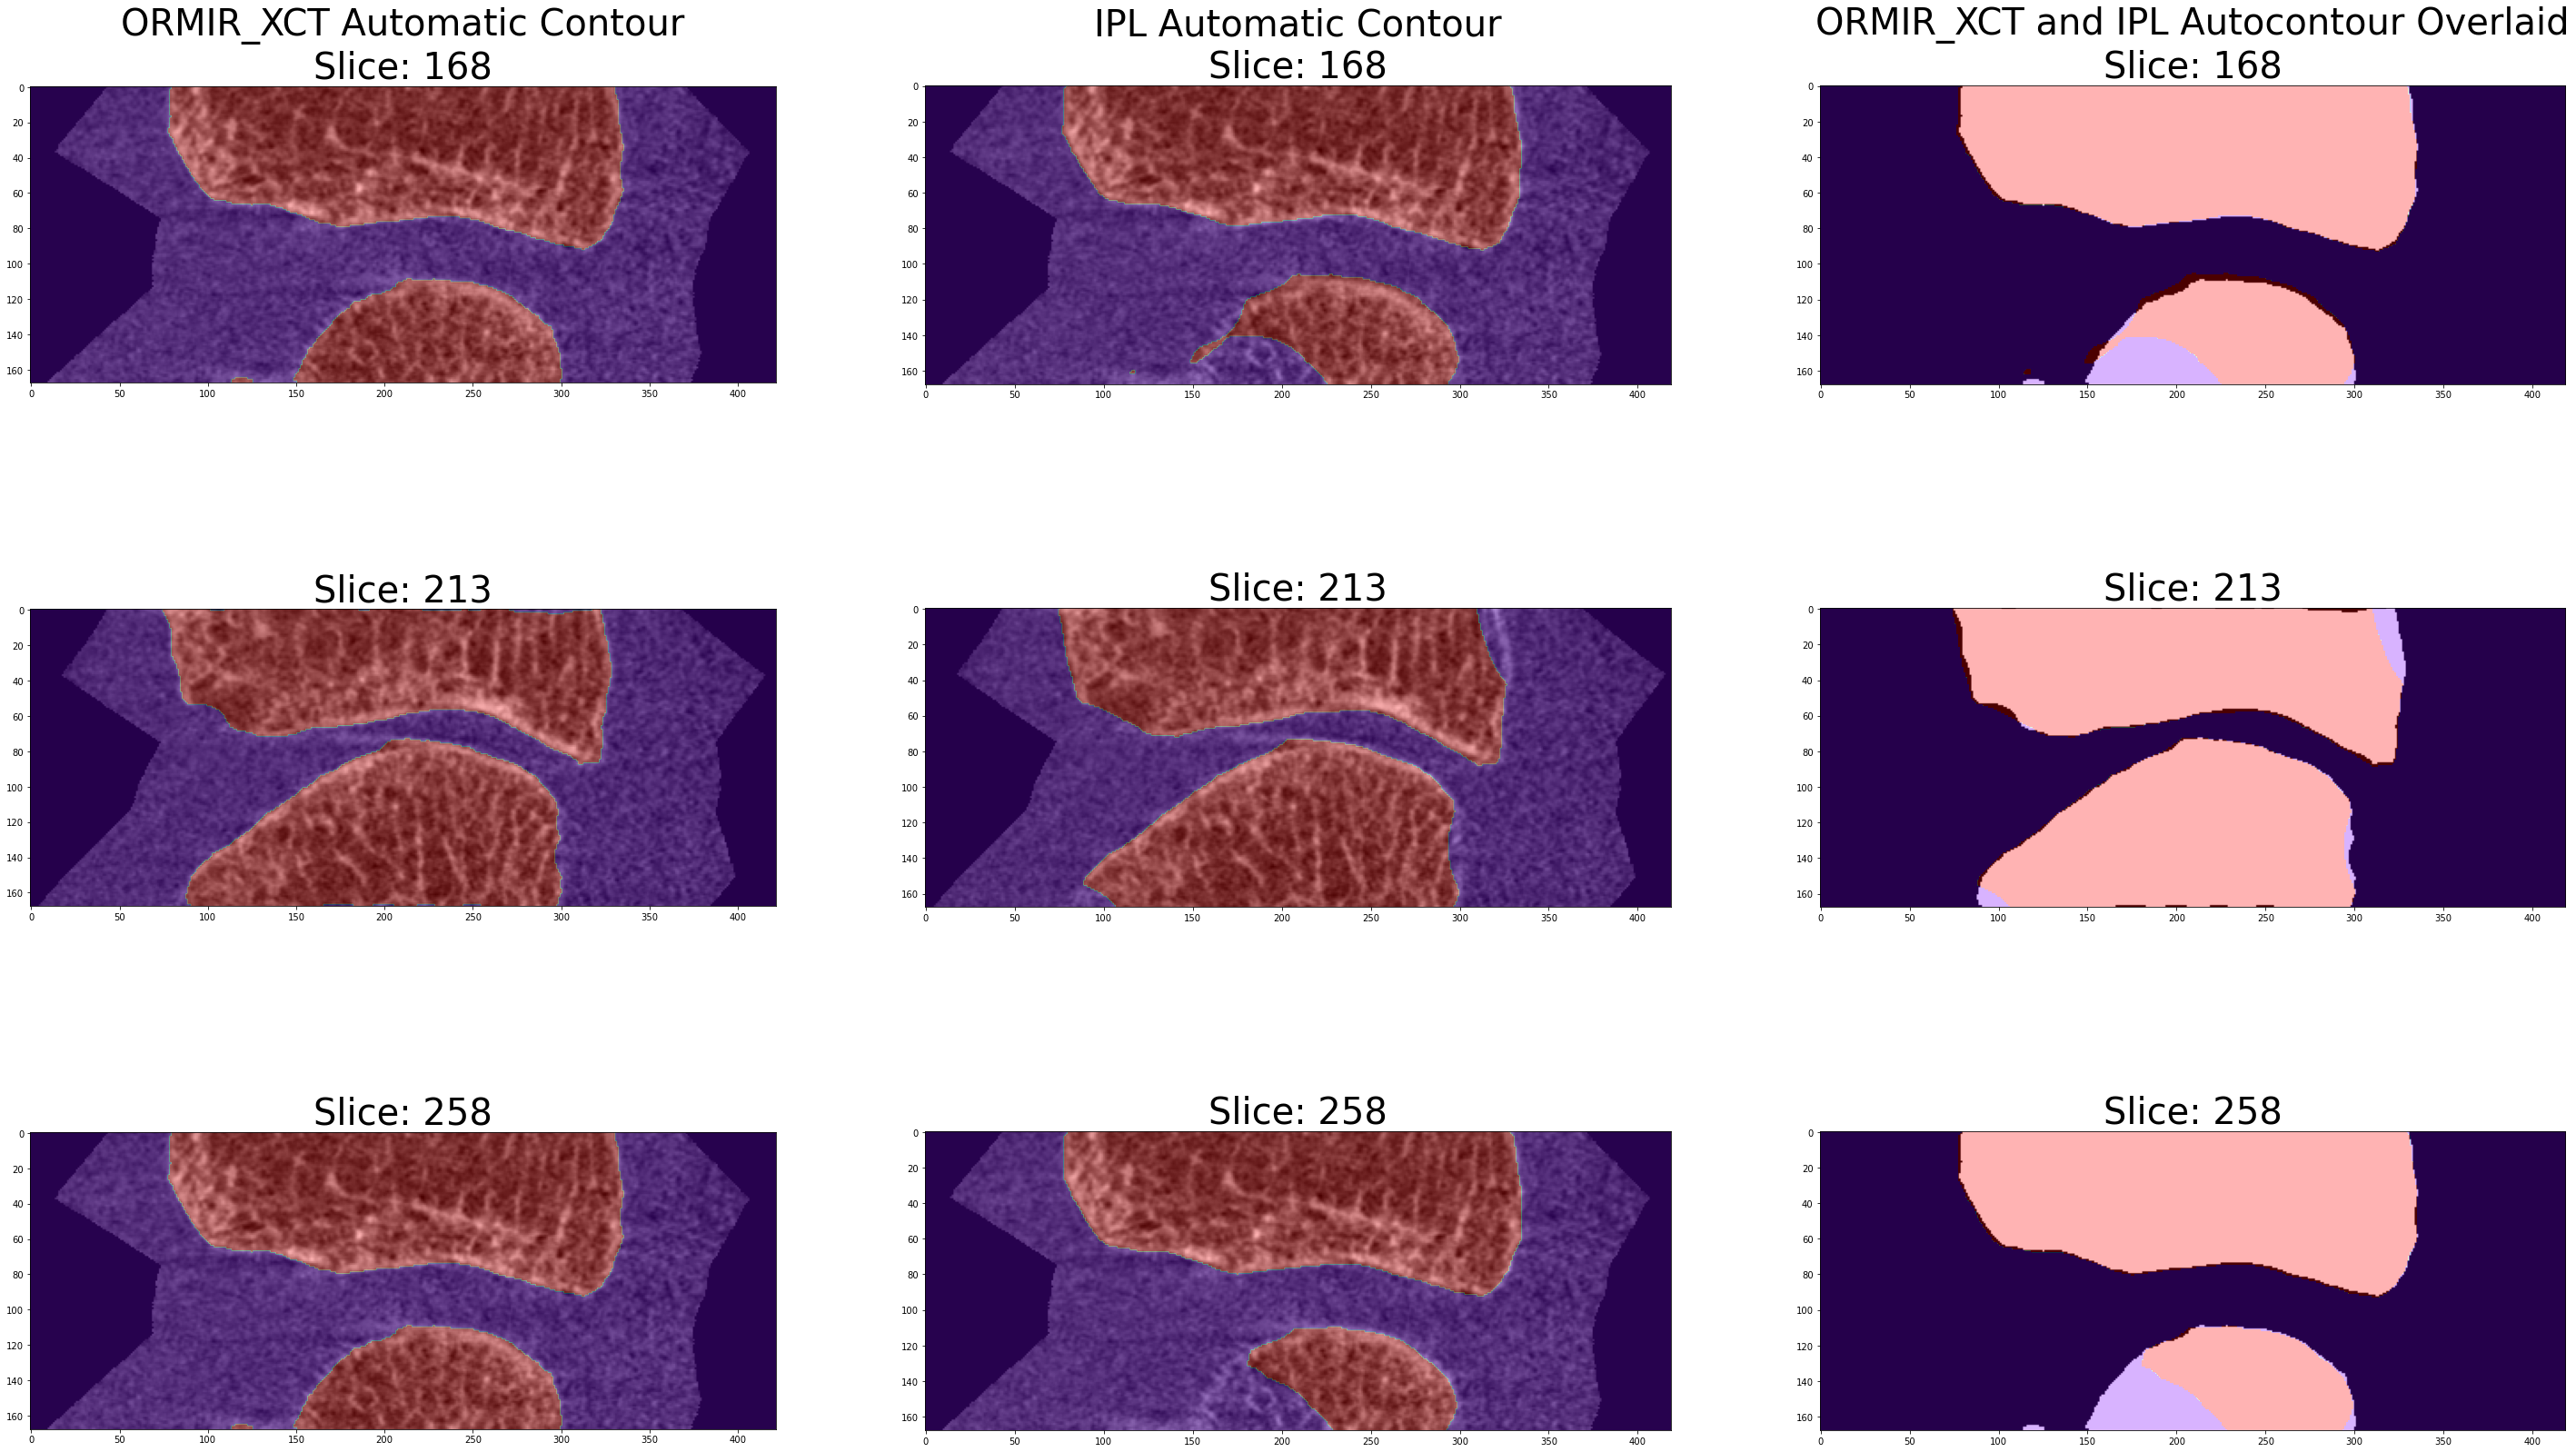

In [87]:
# Plot the segmentations overlaid onto the grayscale image for 3 slices
fig, axs = plt.subplots(3, 3, figsize=(50, 30))

# Slice 1
axs[0][0].set_title(
    "ORMIR_XCT Automatic Contour\nSlice: {}".format(slice1), fontsize=40
)
axs[0][0].imshow(gray_np[view_slice1], cmap="gray")
axs[0][0].imshow(ormir_np[view_slice1], cmap="rainbow", alpha=0.3)

axs[0][1].set_title("IPL Automatic Contour\nSlice: {}".format(slice1), fontsize=40)
axs[0][1].imshow(gray_np[view_slice1], cmap="gray")
axs[0][1].imshow(ipl_np[view_slice1], cmap="rainbow", alpha=0.3)

axs[0][2].set_title(
    "ORMIR_XCT and IPL Autocontour Overlaid\nSlice: {}".format(slice1), fontsize=40
)
axs[0][2].imshow(ormir_np[view_slice1], cmap="gray")
axs[0][2].imshow(ipl_np[view_slice1], cmap="rainbow", vmin=0, vmax=1, alpha=0.3)

# Slice 2
axs[1][0].set_title("Slice: {}".format(slice2), fontsize=40)
axs[1][0].imshow(gray_np[view_slice2], cmap="gray")
axs[1][0].imshow(ormir_np[view_slice2], cmap="rainbow", alpha=0.3)

axs[1][1].set_title("Slice: {}".format(slice2), fontsize=40)
axs[1][1].imshow(gray_np[view_slice2], cmap="gray")
axs[1][1].imshow(ipl_np[view_slice2], cmap="rainbow", alpha=0.3)

axs[1][2].set_title("Slice: {}".format(slice2), fontsize=40)
axs[1][2].imshow(ormir_np[view_slice2], cmap="gray")
axs[1][2].imshow(ipl_np[view_slice2], cmap="rainbow", vmin=0, vmax=1, alpha=0.3)

# Slice 3
axs[2][0].set_title("Slice: {}".format(slice3), fontsize=40)
axs[2][0].imshow(gray_np[view_slice3], cmap="gray")
axs[2][0].imshow(ormir_np[view_slice3], cmap="rainbow", alpha=0.3)

axs[2][1].set_title("Slice: {}".format(slice3), fontsize=40)
axs[2][1].imshow(gray_np[view_slice3], cmap="gray")
axs[2][1].imshow(ipl_np[view_slice3], cmap="rainbow", alpha=0.3)

axs[2][2].set_title("Slice: {}".format(slice3), fontsize=40)
axs[2][2].imshow(ormir_np[view_slice3], cmap="gray")
axs[2][2].imshow(ipl_np[view_slice3], cmap="rainbow", vmin=0, vmax=1, alpha=0.3)

plt.show()

---

<a name="compare"></a>
## *Step 4: Compare Between IPL and ORMIR_XCT:*

Now compare segmentations using metrics.

To compute the metrics, we need to make sure our images are the same size. Use the SimpleITK resample procedural interface to ensure image sizes match.

In [88]:
resampled_ormir = sitk.Resample(
    ormir_mask, ipl_mask, interpolator=sitk.sitkNearestNeighbor
)

ormir_np = sitk.GetArrayFromImage(resampled_ormir)

In [89]:
dice, jaccard = calculate_dice_and_jaccard(ipl_np, ormir_np)
hausdorff = hausdorff_sitk(ipl_mask, resampled_ormir)

print("DICE: ", dice)
print("Jaccard: ", jaccard)
print("Mean Hausdorff Distance: ", hausdorff[0])
print("Maximum Hausdorff Distance: ", hausdorff[1])

DICE:  0.9364050145853038
Jaccard:  0.8804150333787056
Mean Hausdorff Distance:  0.049085319987414784
Maximum Hausdorff Distance:  3.945893923516315


---
<a name="attribution"></a>

Notebook created using the [template](https://github.com/ORMIRcommunity/templates/blob/main/ORMIR_nb_template.ipynb) of the [ORMIR community](https://ormircommunity.github.io/) (version 1.0, 2023)